# Building and solving a Newclid problem from a JGEX encoding

This tutorial shows you how to get the full solution of a problem prescribed as a JGEX string.

## Build a NcProblem from a JGEX string

Your problem should have a name, its encoding as a JGEX string, and a folder where the outputs of the solution can be saved.

In [1]:
from pathlib import Path

problem_name = "incenter_excenter"
problem_string = (
    "a b c = triangle a b c; d = incenter d a b c; e = excenter e a b c ? perp d c c e"
)
output_folder = Path("solutions_incenter_excenter")

## Building and solving the problem

As the standard way of prescribing problems, JGEX problems can be built and solved straight away.

Notice the include_auxilary_clauses() method in the builder. If your problem specify some constructions as auxiliary, you can choose to run the problem with the auxiliary constructions.

Pass **True** as an argument for the method if you want to use the auxiliary points or **False** if you don't.

In [2]:
import numpy as np
from newclid.api import GeometricSolverBuilder
from newclid.jgex.problem_builder import JGEXProblemBuilder

rng = np.random.default_rng(0)

jgex_problem_builder = (
    JGEXProblemBuilder(rng=rng)
    .include_auxiliary_clauses(True)
    .with_problem_from_txt(
        problem_txt=problem_string,
        problem_name=problem_name,
    )
)

problem_setup = (
    jgex_problem_builder.build()
)  # Builds points coordinates with valid assumptions and goals

solver = GeometricSolverBuilder(rng=rng).build(problem_setup)
solver.run()

True

## Outputs of the solver: run infos

The solution of the problem provides many outputs that may be interesting to the user. First we present the run infos.

In [3]:
if solver.run_infos:
    run_infos_without_agent = solver.run_infos.model_copy(deep=True)
    run_infos_without_agent.agent_stats = None
    print(f"Run infos:\n {run_infos_without_agent}")

Run infos:
 runtime=0.01894998550415039 success=True steps=2 success_per_goal={'CD ⟂ CE succeeded': True} agent_stats=None


## Outputs of the solver: Proof

The proof of the problem in natural language provides the goals of the problem with their solved status, the hypothesis given to the solver, the proof steps, and the AR tables at the end.

In [4]:
natural_language_proof = solver.proof()
print(natural_language_proof)

# Problem setup:

## Points

- A(0.4127, 0.5303)
- B(0.9202, 0.6639)
- C(0.5468, 1.2823)
- D(0.6404, 0.7773)
- E(1.2215, 1.4074)

## Assumptions:

[C0] : ∠(AC,CD) = ∠(CD,BC)
[C1] : ∠(AC,CE) = ∠(CE,BC)


# Goals

CD ⟂ CE : Proved [0]


# Proof:

000. | ∠(AC,CD) = ∠(CD,BC) [C0], ∠(AC,CE) = ∠(CE,BC) [C1] =(AR Deduction)> CD ⟂ CE [0]


# Appendix: AR deductions:



000. | Angle Chasing to prove CD ⟂ CE:
| Premise ∠(AC,CD) = ∠(CD,BC) gives a linear equation with coefficients {AC: -1, BC: -1, CD: 2}
| Premise ∠(AC,CE) = ∠(CE,BC) gives a linear equation with coefficients {AC: -1, BC: -1, CE: 2}
| Then {AC: -1/2, BC: -1/2, CD: 1} + -1/2 x {AC: -1, BC: -1, CE: 2}
|    = {CD: 1, CE: -1}
We are left with a linear equation with coefficients {CD: 1, CE: -1} that gives CD ⟂ CE

End of proof.


## Outputs of the solver: Animation

Here you can see a gif with the visualization of the proof steps in a graphic representation of the problem.

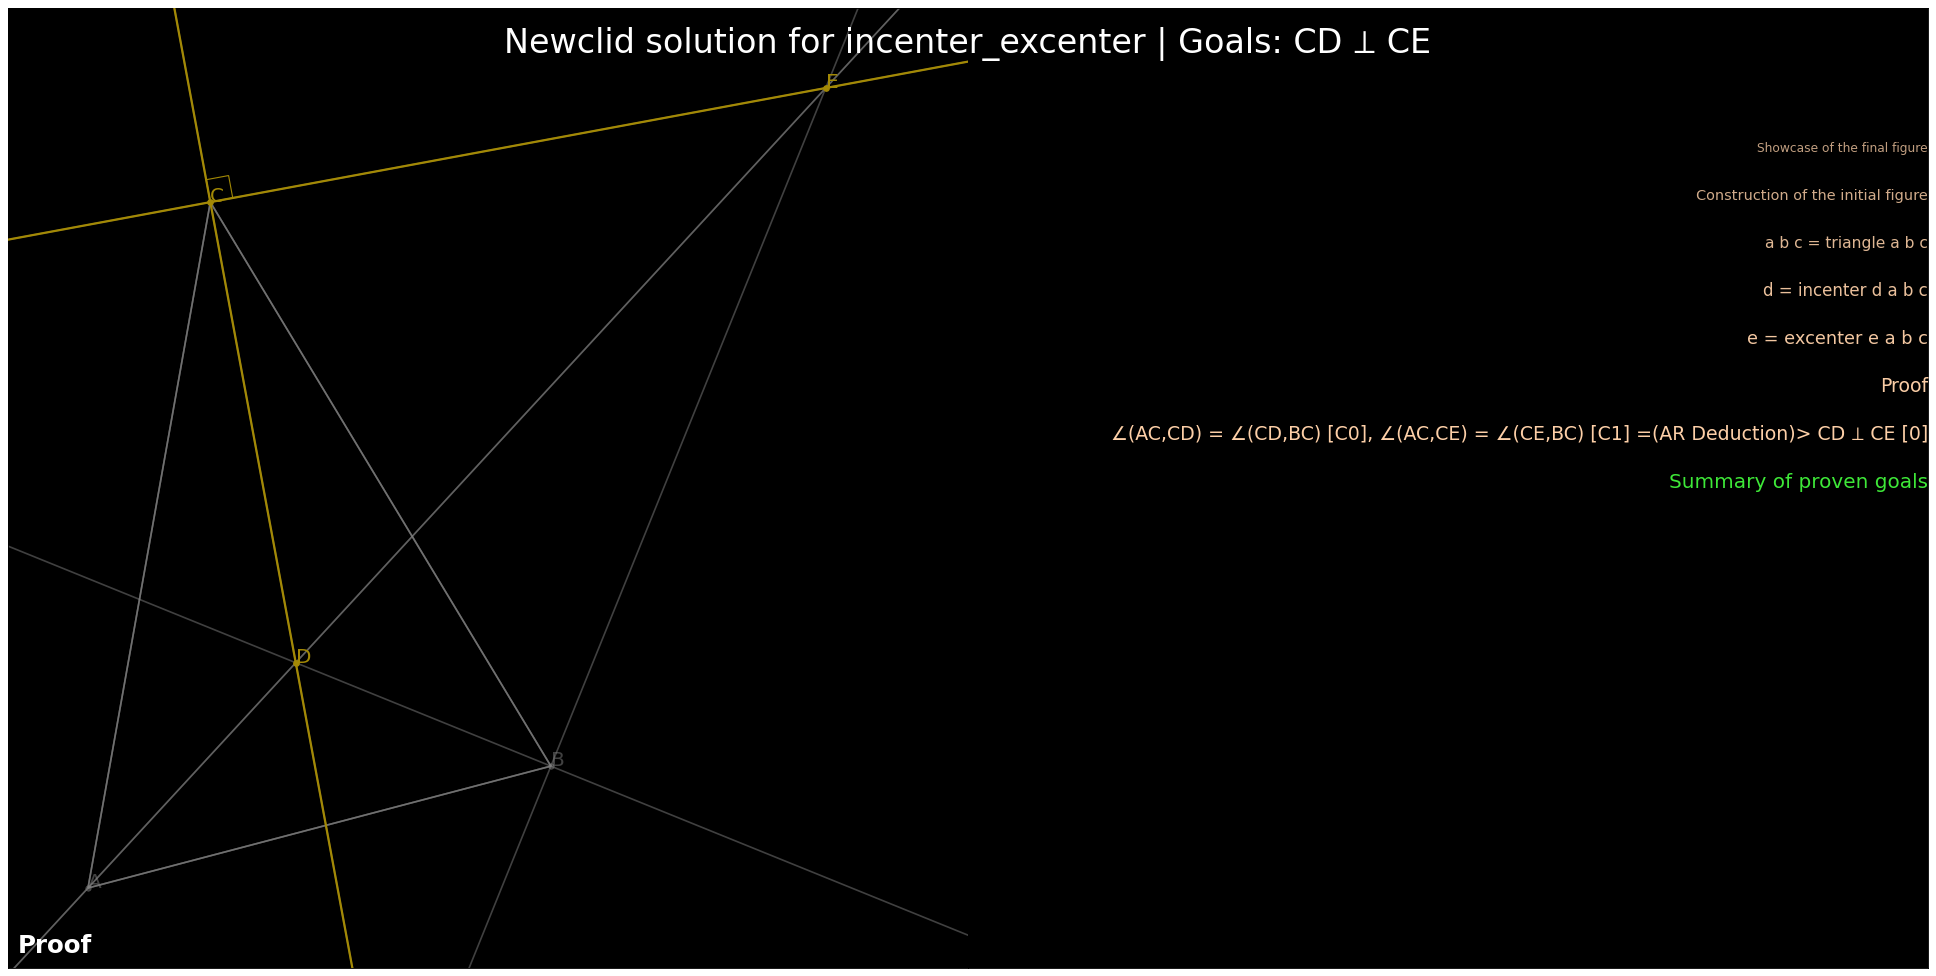

In [5]:
from IPython.display import HTML
from newclid.animation import html_animation

assert jgex_problem_builder.jgex_problem is not None
HTML(html_animation(solver.animate(jgex_problem_builder.jgex_problem)))

## Saving outputs

The outputs of the proof can also be saved as files into a designed folder. The saved outputs will be:

- The proof figure,
- The text of the proof,
- A JSON file with the run infos,
- A folder containing the initial picture of the problem, the graph of the proof, and the two of them in an HTML page.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


solutions_incenter_excenter/incenter_excenter/html/dependency_graph.html


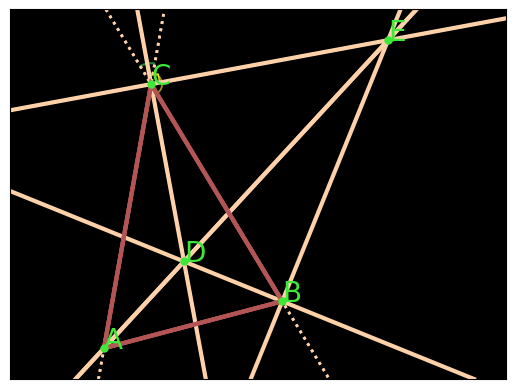

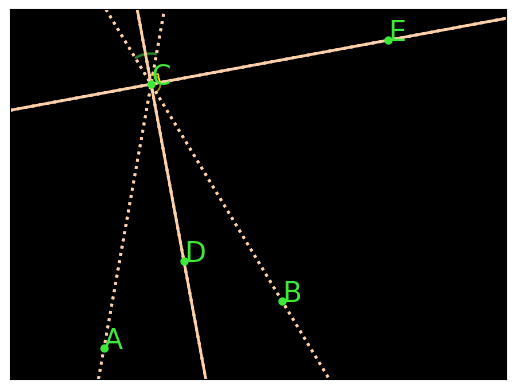

In [6]:
solver.write_all_outputs(
    output_folder / problem_name, jgex_problem=jgex_problem_builder.jgex_problem
)